# 🎶 SQL Practice with Chinook Database

## 📌 Introduction
Welcome to my SQL practice project using the **Chinook SQLite database**.  
This database represents a digital media store and contains:
- Artists, Albums, and Tracks  
- Customers and Invoices  
- Employees and Sales data  

This notebook is part of my AI Journey.  
My objectives are:
1. Strengthen SQL fundamentals  
2. Practice advanced SQL (joins, subqueries, aggregations)  
3. Integrate SQL with Python (via Pandas) for analysis + visualization  

Dataset: [Chinook SQLite](https://github.com/lerocha/chinook-database/releases)  

In [1]:
# Load Python libraries
import sqlite3
import pandas as pd

# Connect to Chinook database
conn = sqlite3.connect("data/Chinook_Sqlite.sqlite")

### Basic SELECT Queries
We’ll start with simple `SELECT` statements to explore the `Customer` and `Album` tables.

In [13]:
query1 = "SELECT FirstName, LastName, Country FROM Customer LIMIT 10;"
pd.read_sql_query(query1, conn)

,FirstName,LastName,Country
0,Luís,Gonçalves,Brazil
1,Leonie,Köhler,Germany
2,François,Tremblay,Canada
3,Bjørn,Hansen,Norway
4,František,Wichterlová,Czech Republic
5,Helena,Holý,Czech Republic
6,Astrid,Gruber,Austria
7,Daan,Peeters,Belgium
8,Kara,Nielsen,Denmark
9,Eduardo,Martins,Brazil


### Filtering Examples
We can filter customers by their country or tracks by their duration.

In [18]:
query2 = """
SELECT Name, Milliseconds 
FROM Track
WHERE Milliseconds > 300000
ORDER BY Milliseconds DESC
LIMIT 10;
"""
pd.read_sql_query(query2, conn)

,Name,Milliseconds
0,Occupation / Precipice,5286953
1,Through a Looking Glass,5088838
2,"Greetings from Earth, Pt. 1",2960293
3,The Man With Nine Lives,2956998
4,"Battlestar Galactica, Pt. 2",2956081
5,"Battlestar Galactica, Pt. 1",2952702
6,Murder On the Rising Star,2935894
7,"Battlestar Galactica, Pt. 3",2927802
8,Take the Celestra,2927677
9,Fire In Space,2926593


### Distinct Values and Sorting
Here we check the distinct countries where customers are from.

In [20]:
query3 = "SELECT DISTINCT Country FROM Customer ORDER BY Country;"
pd.read_sql_query(query3, conn)

,Country
0,Argentina
1,Australia
2,Austria
3,Belgium
4,Brazil
5,Canada
6,Chile
7,Czech Republic
8,Denmark
9,Finland


### Inner Joins: Tracks, Albums, and Artists
Here we join `Track`, `Album`, and `Artist` tables to show the track name, album title, and artist name.

In [22]:
query4 = """
SELECT t.Name AS Track, a.Title AS Album, ar.Name AS Artist
FROM Track t
JOIN Album a ON t.AlbumId = a.AlbumId
JOIN Artist ar ON a.ArtistId = ar.ArtistId
LIMIT 10;
"""
pd.read_sql_query(query4, conn)

,Track,Album,Artist
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Balls to the Wall,Accept
2,Fast As a Shark,Restless and Wild,Accept
3,Restless and Wild,Restless and Wild,Accept
4,Princess of the Dawn,Restless and Wild,Accept
5,Put The Finger On You,For Those About To Rock We Salute You,AC/DC
6,Let's Get It Up,For Those About To Rock We Salute You,AC/DC
7,Inject The Venom,For Those About To Rock We Salute You,AC/DC
8,Snowballed,For Those About To Rock We Salute You,AC/DC
9,Evil Walks,For Those About To Rock We Salute You,AC/DC


### Aggregations
Example: Revenue by country, and the top 5 customers by total spending.

In [23]:
query5 = """
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC
LIMIT 10;
"""
pd.read_sql_query(query5, conn)

,BillingCountry,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### Subqueries
Find customers who spent more than the average spending level.

In [25]:
query6 = """
SELECT FirstName, LastName, CustomerId
FROM Customer
WHERE CustomerId IN (
    SELECT CustomerId
    FROM Invoice
    GROUP BY CustomerId
    HAVING SUM(Total) > (SELECT AVG(Total) FROM Invoice)
);
"""
pd.read_sql_query(query6, conn)

,FirstName,LastName,CustomerId
0,Luís,Gonçalves,1
1,Leonie,Köhler,2
2,François,Tremblay,3
3,Bjørn,Hansen,4
4,František,Wichterlová,5
5,Helena,Holý,6
6,Astrid,Gruber,7
7,Daan,Peeters,8
8,Kara,Nielsen,9
9,Eduardo,Martins,10


### Complex Invoice Query
Join customers, invoices, and invoice lines to view purchases.

In [26]:
query7 = """
SELECT c.FirstName, c.LastName, i.InvoiceId, i.InvoiceDate, il.Quantity, t.Name AS Track
FROM Invoice i
JOIN Customer c ON i.CustomerId = c.CustomerId
JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
JOIN Track t ON il.TrackId = t.TrackId
LIMIT 15;
"""
pd.read_sql_query(query7, conn)

,FirstName,LastName,InvoiceId,InvoiceDate,Quantity,Track
0,Leonie,Köhler,1,2009-01-01 00:00:00,1,Balls to the Wall
1,Leonie,Köhler,1,2009-01-01 00:00:00,1,Restless and Wild
2,Bjørn,Hansen,2,2009-01-02 00:00:00,1,Put The Finger On You
3,Bjørn,Hansen,2,2009-01-02 00:00:00,1,Inject The Venom
4,Bjørn,Hansen,2,2009-01-02 00:00:00,1,Evil Walks
5,Bjørn,Hansen,2,2009-01-02 00:00:00,1,Breaking The Rules
6,Daan,Peeters,3,2009-01-03 00:00:00,1,Dog Eat Dog
7,Daan,Peeters,3,2009-01-03 00:00:00,1,Overdose
8,Daan,Peeters,3,2009-01-03 00:00:00,1,Love In An Elevator
9,Daan,Peeters,3,2009-01-03 00:00:00,1,Janie's Got A Gun


### Wrap-Up
In this session I practiced:
- SQL basics (SELECT, WHERE, ORDER BY, DISTINCT)
- Joins (INNER, multi-table joins: Tracks + Albums + Artists)
- Aggregations (GROUP BY, SUM, AVG, HAVING)
- Subqueries (customers above average spend)
- Integrating SQL queries into Pandas DataFrame for analysis

**Next Step**: add visualizations (matplotlib/seaborn) to bring the data to life.

### Visualization Examples
We’ll now add charts (Pandas/Matplotlib) to make insights clearer:
- Revenue by Country (bar chart)  
- Top 10 Genres by Average Track Length  
- Customer Lifetime Value Distribution

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

## Revenue by Country
We want to see how much revenue comes from each **country**.

**Query logic:**  
- Use the **Invoice** table.  
- Group by `BillingCountry`.  
- Sum the `Total` invoice amounts.  
- Order by revenue (descending).  

This gives us the **geographic distribution of revenue**.

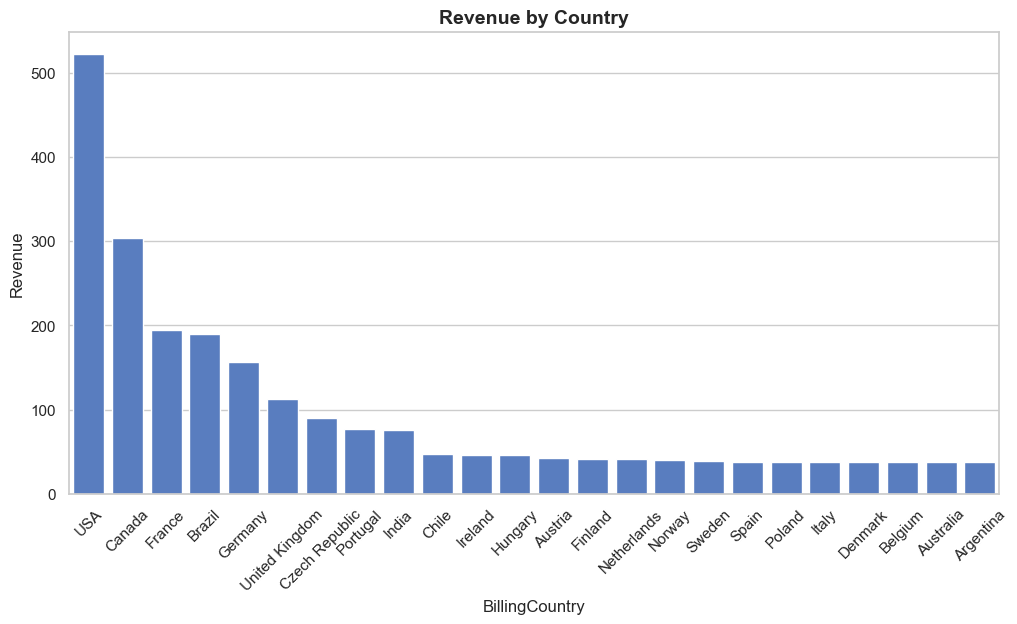

In [30]:
query = """
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="BillingCountry", y="Revenue")
plt.xticks(rotation=45)
plt.title("Revenue by Country", fontsize=14, fontweight='bold')
plt.show()

## Top 10 Customers by Total Spend
This helps identify **high-value customers**.  

**Query logic:**  
- Join **Customer** and **Invoice**.  
- Group by `CustomerId`.  
- Compute `SUM(Total)` to find total spend.  
- Order by spend descending and limit to 10.  

This yields a list of **the store’s best customers**.

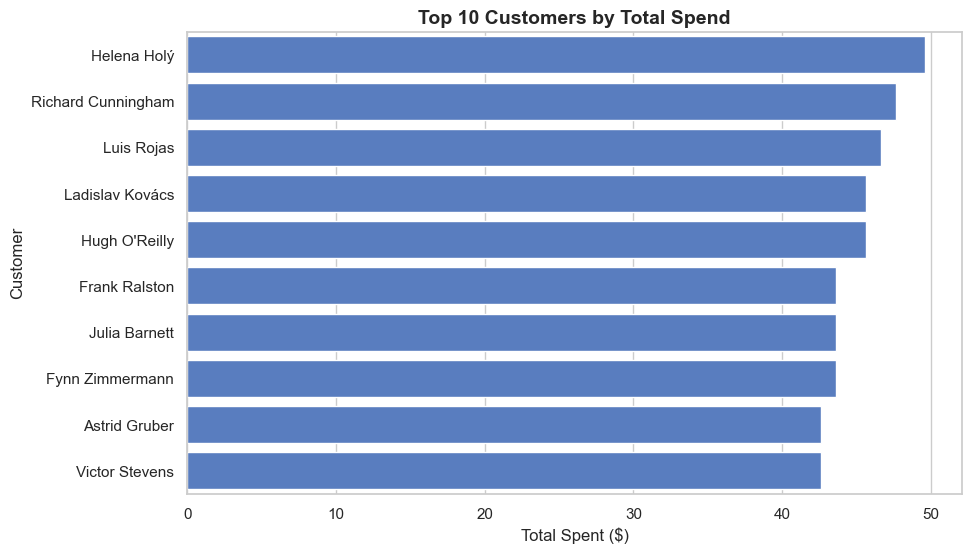

In [32]:
query = """
SELECT c.FirstName || ' ' || c.LastName AS CustomerName, SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, y="CustomerName", x="TotalSpent")
plt.title("Top 10 Customers by Total Spend", fontsize=14, fontweight='bold')
plt.xlabel("Total Spent ($)")
plt.ylabel("Customer")
plt.show()

## Monthly Revenue Trends
We now want to see **sales performance over time**.

**Query logic:**  
- From the **Invoice** table, get `InvoiceDate` and `Total`.  
- In Pandas, convert `InvoiceDate` to a datetime and group by month.  
- Sum the monthly totals.  

This shows whether sales are increasing, stable, or seasonal.

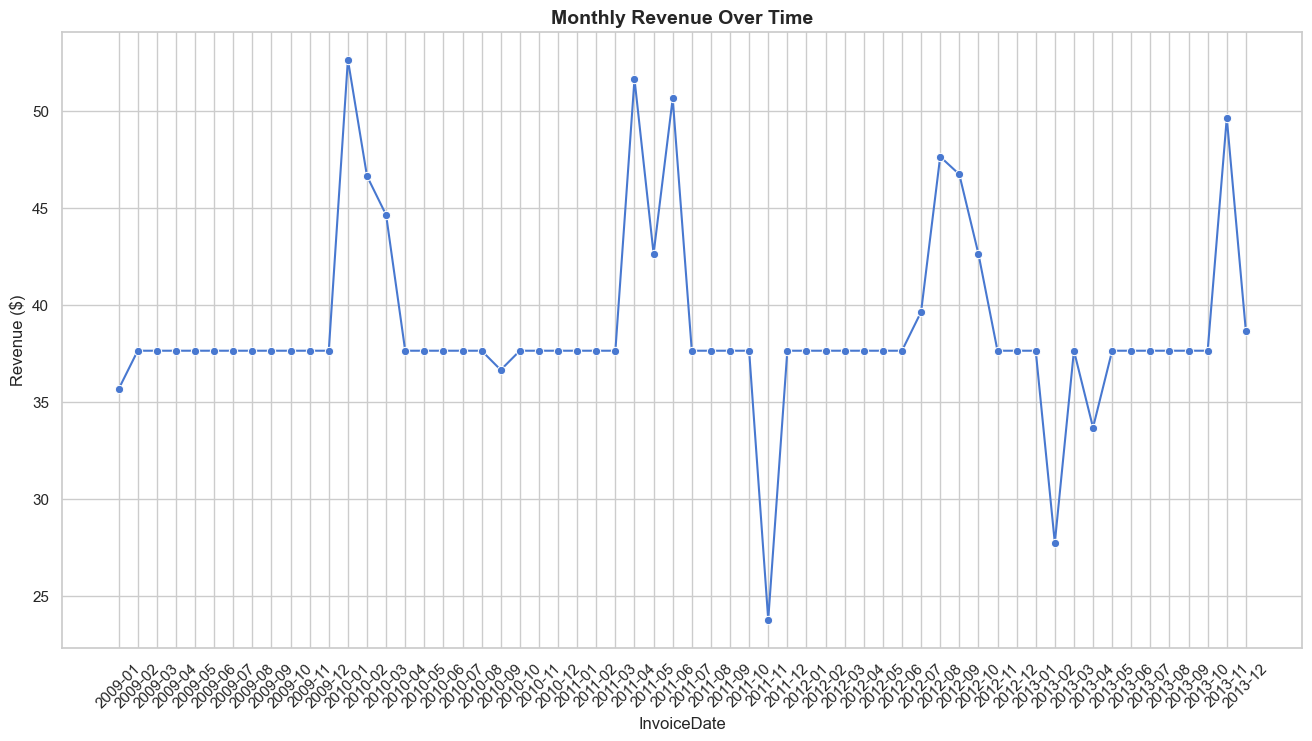

In [37]:
query = """
SELECT InvoiceDate, Total
FROM Invoice
ORDER BY InvoiceDate;
"""
df = pd.read_sql_query(query, conn)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Group monthly
df_monthly = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Total"].sum().reset_index()
df_monthly["InvoiceDate"] = df_monthly["InvoiceDate"].astype(str)

plt.figure(figsize=(16,8))
sns.lineplot(data=df_monthly, x="InvoiceDate", y="Total", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Over Time", fontsize=14, fontweight='bold')
plt.ylabel("Revenue ($)")
plt.show()

## Average Track Length per Genre
Some genres are naturally longer (classical) and others shorter (pop, rock).  

**Query logic:**  
- Join **Track** with **Genre**.  
- Calculate average track duration (`AVG(Milliseconds)`).  
- Convert milliseconds to minutes.  
- Group by genre.  

This helps us **compare genres by average song length**.

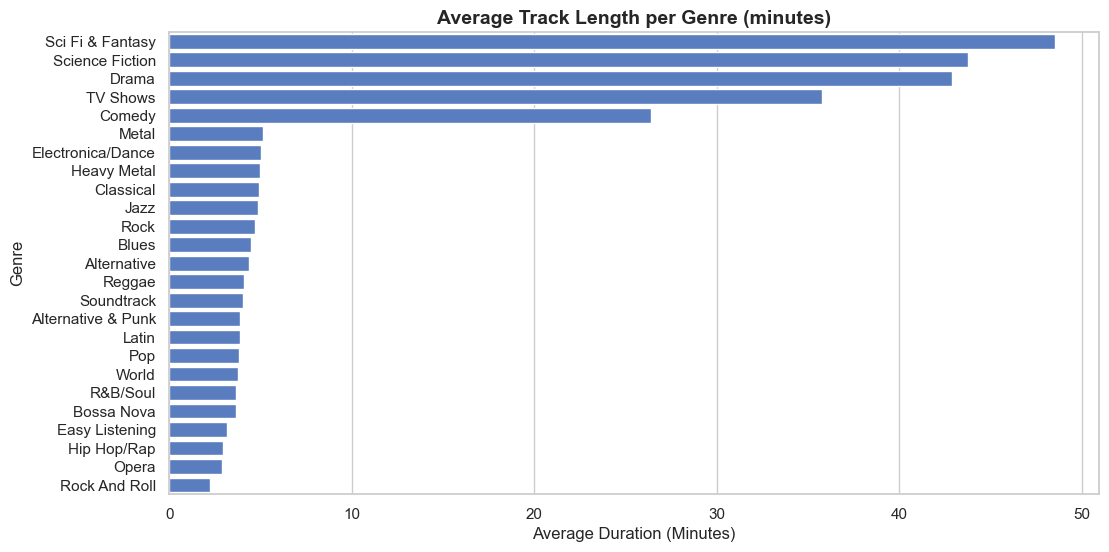

In [42]:
query = """
SELECT g.Name AS Genre, AVG(t.Milliseconds)/60000 AS AvgTrackLengthMin
FROM Track t
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY AvgTrackLengthMin DESC;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="AvgTrackLengthMin", y="Genre")
plt.title("Average Track Length per Genre (minutes)", fontsize=14, fontweight='bold')
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Genre")
plt.show()

## Distribution of Track Durations
Now we analyze the **overall distribution** of track lengths.

**Query logic:**  
- Select duration in minutes from **Track** table.  
- Visualize using a histogram.  

This helps verify whether most tracks follow the industry standard (~3–5 min).

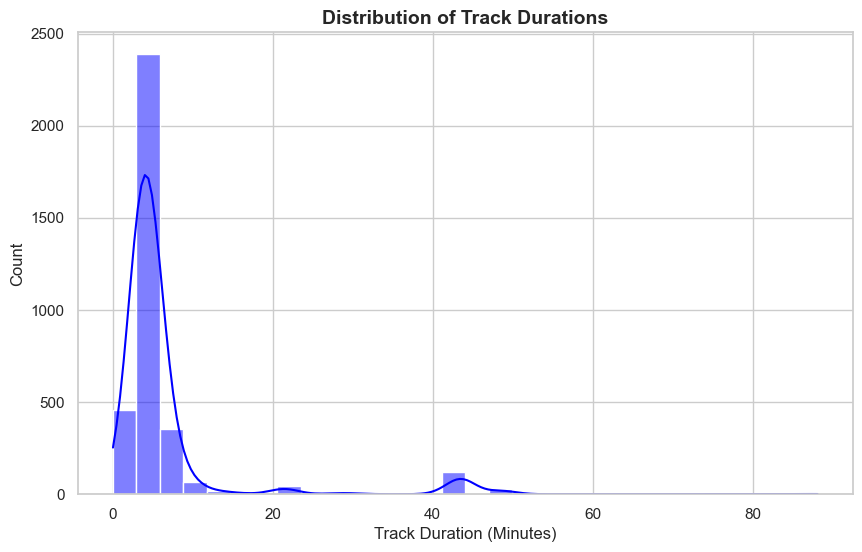

In [39]:
query = "SELECT Milliseconds/60000.0 AS DurationMin FROM Track;"
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
sns.histplot(df["DurationMin"], bins=30, kde=True, color="blue")
plt.title("Distribution of Track Durations", fontsize=14, fontweight='bold')
plt.xlabel("Track Duration (Minutes)")
plt.ylabel("Count")
plt.show()

## Top 10 Artists by Units Sold

### Query logic:
- Join **InvoiceLine** with **Track → Album → Artist**.  
- Compute total **Units Sold** per artist using `SUM(Quantity)`.  
- Group by `ArtistId` and order descending.  

This shows the **most popular artists** based on number of tracks sold.

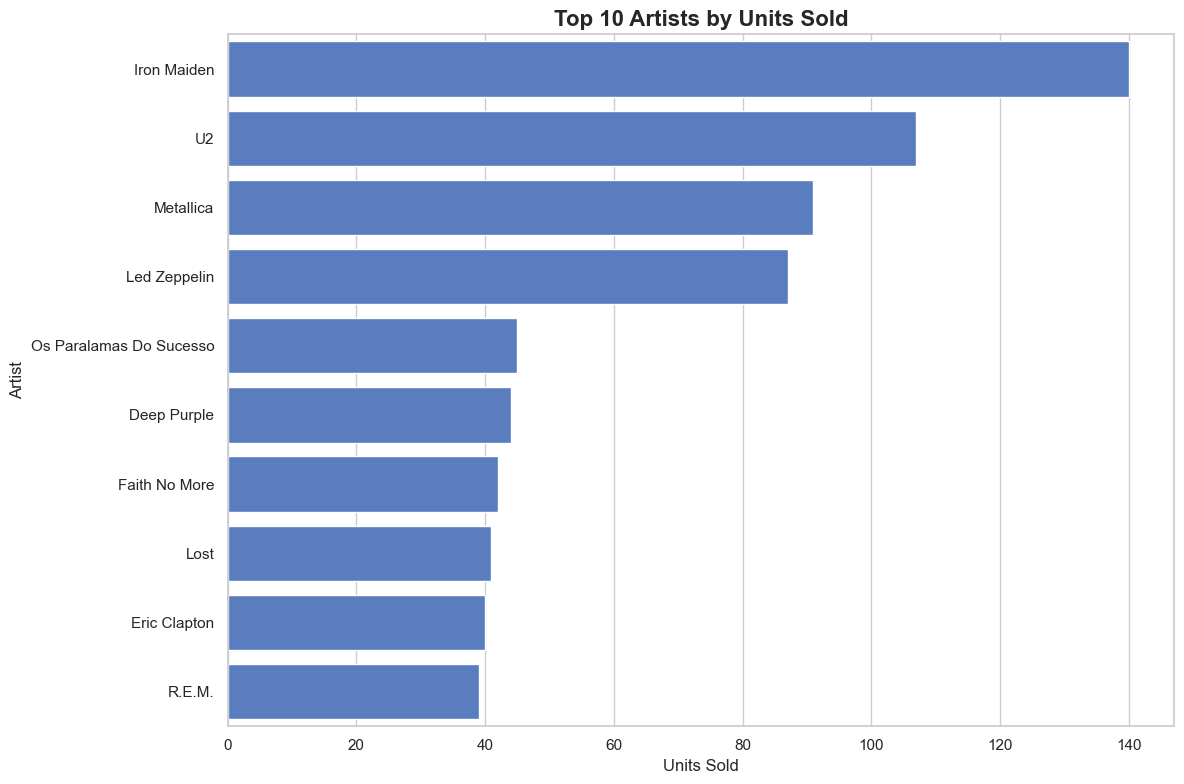

In [48]:
query = """
SELECT ar.Name AS ArtistName,
       SUM(il.Quantity) AS UnitsSold
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.ArtistId
ORDER BY UnitsSold DESC
LIMIT 10;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,8))
sns.barplot(data=df, x="UnitsSold", y="ArtistName")
plt.title("Top 10 Artists by Units Sold", fontsize=16, fontweight='bold')
plt.xlabel("Units Sold")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

## 🎭 Genre Popularity
Finally, let’s explore which genres dominate the catalog.

**Query logic:**  
- Join **Track** with **Genre**.  
- Count the number of tracks per genre.  
- Order descending.  

Here, we visualize in two ways:
1. **Pie chart (Top 5 Genres + Other)** → overview.  
2. **Bar chart (all genres)** → full detail.

This ensures readability while also displaying all categories.

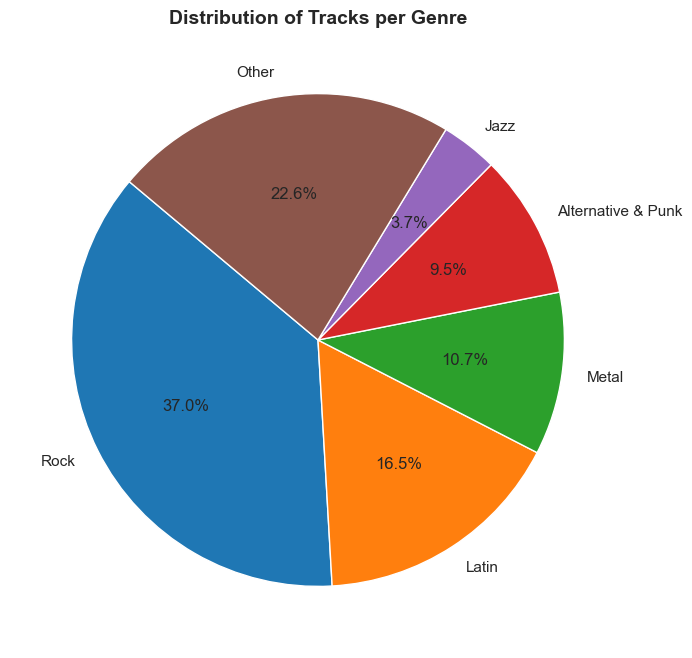

In [49]:
query = """
SELECT g.Name AS Genre, COUNT(t.TrackId) AS NumTracks
FROM Track t
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY NumTracks DESC;
"""
df = pd.read_sql_query(query, conn)

# Group into Top 5 + Other
top_n = 5
df_top = df.head(top_n)
df_other = pd.DataFrame({
    "Genre": ["Other"],
    "NumTracks": [df["NumTracks"].iloc[top_n:].sum()]
})
df_final = pd.concat([df_top, df_other], ignore_index=True)

# Plot pie
plt.figure(figsize=(8,8))
plt.pie(
    df_final["NumTracks"],
    labels=df_final["Genre"],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("tab10", len(df_final))
)
plt.title("Distribution of Tracks per Genre", fontsize=14, fontweight='bold')
plt.show()

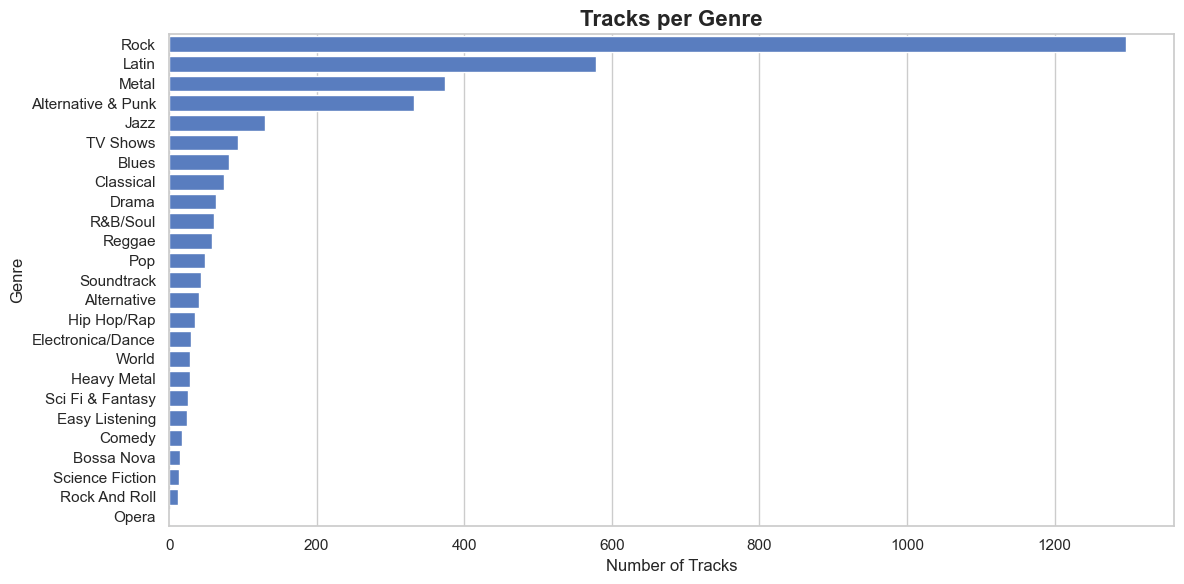

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, y="Genre", x="NumTracks")
plt.title("Tracks per Genre", fontsize=16, fontweight='bold')
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# ✅ Conclusion & Wrap-Up

In this notebook we practiced SQL inside Python with the **Chinook music store database**.  

### Key Learnings:
- **SQL Fundamentals:** SELECT, WHERE, GROUP BY, HAVING, JOINs, Subqueries  
- **Revenue Analysis:**  
  - Sales by country showed the USA, Canada, and Brazil as key markets.  
  - Top 10 Customers analysis identified the store’s most valuable buyers.  
  - Monthly trends allowed us to observe the business evolution.  
- **Music Insights:**  
  - Average track durations matched industry norms (3–5 minutes).  
  - Longer tracks were mostly Classical/Opera.  
  - Genre distribution highlighted Rock, Latin, and Metal as top catalog segments.  
- **Visual Reporting:** Using **Matplotlib + Seaborn**, SQL results were transformed into business‑friendly visuals.

---